In [ ]:
#pip install pandas

In [1]:
import pandas as pd
import os

In [4]:
# Directory containing the CSV files
csv_directory = '../csv'

# Dictionary to hold all dataframes
dataframes = {}

# Loop through each file in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        # The path to the CSV file
        file_path = os.path.join(csv_directory, filename)
        # Read the CSV file and store it in a dataframe
        df = pd.read_csv(file_path)
        # Remove the '.csv' from filename to use as dictionary key
        table_name = filename[:-4]
        # Store the dataframe in the dictionary
        dataframes[table_name] = df
        print(f"Loaded {filename} into DataFrame.")


Loaded AdditionalInfo.csv into DataFrame.
Loaded DetailMarket.csv into DataFrame.
Loaded DetailMarketTextTextContent.csv into DataFrame.
Loaded EmptyPanel.csv into DataFrame.
Loaded Market.csv into DataFrame.
Loaded MarketContract.csv into DataFrame.
Loaded MarketHighlights.csv into DataFrame.
Loaded NearbyPlaces.csv into DataFrame.
Loaded TypeOfShops.csv into DataFrame.


In [6]:
market_df = dataframes['Market']

market_df = market_df.drop(columns=['UrlImageProfile', 'LinkDetail'])

print(market_df.head())

   MarketId                   MarketName  MarketRating         MarketAddress  \
0         1              ตลาดบางแคภิรมย์    4.10 (254)  บางแค, กรุงเทพมหานคร   
1         2      ตลาดธนบุรี (สนามหลวง 2)  4.20 (8,118)  บางแค, กรุงเทพมหานคร   
2         3               ตลาดสมบัติบุรี  4.40 (2,617)  บางแค, กรุงเทพมหานคร   
3         4   ตลาดนัดมีนบุรี (จตุจักร 2)  4.10 (2,087)  บางแค, กรุงเทพมหานคร   
4         5  ตลาดนำชัยแฟร์  Numchai fair      4.70 (6)  บางแค, กรุงเทพมหานคร   

   MarketPrice  
0        500.0  
1        800.0  
2        150.0  
3        550.0  
4       6300.0  


In [18]:
market_df['MarketRating'] = market_df['MarketRating'].fillna('0.00 (0)')

# Ensure MarketRating is a string before using .str.extract()
market_df['MarketRating'] = market_df['MarketRating'].astype(str)

# Extract ReviewAmount from the parentheses
market_df['ReviewAmount'] = market_df['MarketRating'].str.extract(r'\((\d+)\)')

# Extract MarketRating without the parentheses
market_df['MarketRating'] = market_df['MarketRating'].str.extract(r'(\d+\.\d+)')

# Convert data types if needed
market_df['MarketRating'] = market_df['MarketRating'].astype(float)
market_df['ReviewAmount'] = market_df['ReviewAmount'].fillna(0).astype(int)

print(market_df)

      MarketId                   MarketName  MarketRating  \
0            1              ตลาดบางแคภิรมย์           4.1   
1            2      ตลาดธนบุรี (สนามหลวง 2)           0.0   
2            3               ตลาดสมบัติบุรี           0.0   
3            4   ตลาดนัดมีนบุรี (จตุจักร 2)           0.0   
4            5  ตลาดนำชัยแฟร์  Numchai fair           4.7   
...        ...                          ...           ...   
1832      1833         ตลาดวัดเทพฯ ดอนเมือง           4.0   
1833      1834      ตลาดพีเพิลพาร์ค อ่อนนุช           0.0   
1834      1835  ศูนย์อาหารถนอมมิตร พระราม 4           4.4   
1835      1836       ตลาดทิพย์นิมิตร บางพลี           0.0   
1836      1837              ตลาดใหม่ทุ่งครุ           4.4   

                          MarketAddress  MarketPrice  ReviewAmount  
0                  บางแค, กรุงเทพมหานคร        500.0             0  
1                  บางแค, กรุงเทพมหานคร        800.0             0  
2                  บางแค, กรุงเทพมหานคร        150.0        

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

การวิเคราะห์การกระจายคะแนนตลาด (MarketRating Distribution)

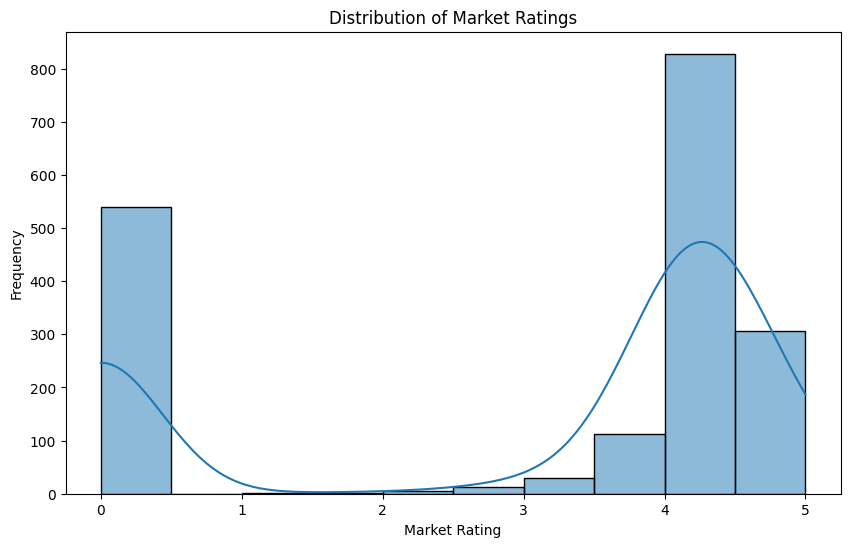

In [20]:

# สร้างกราฟการกระจายคะแนนตลาด
plt.figure(figsize=(10, 6))
sns.histplot(market_df['MarketRating'], bins=10, kde=True)
plt.title('Distribution of Market Ratings')
plt.xlabel('Market Rating')
plt.ylabel('Frequency')
plt.show()


การกระจายราคาตลาด (MarketPrice Distribution)

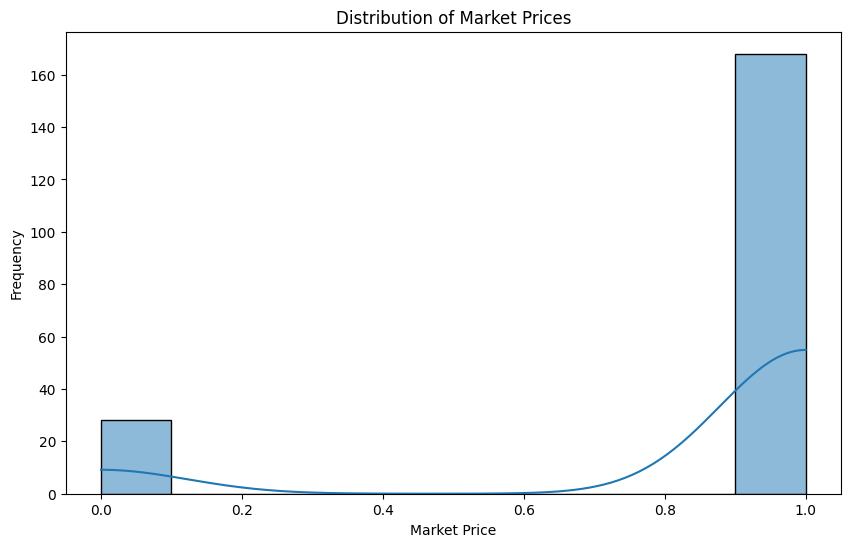

In [22]:
market_df_filtered = market_df.dropna(subset=['MarketPrice'])

# สร้างกราฟการกระจายราคาตลาด
plt.figure(figsize=(10, 6))
sns.histplot(market_df_filtered['MarketPrice'], bins=10, kde=True)
plt.title('Distribution of Market Prices')
plt.xlabel('Market Price')
plt.ylabel('Frequency')
plt.show()
